# Example notebook for generating masks with pyMOE 

In the following we exemplify how to generate masks using the generate module:
* Circular aperture (binary + save into image file) 
* Rectangular aperture  (binary + save into image file)
* Fresnel Zone Plate (binary + save into image file)
* Fresnel lens (with arbitrary number of layers) 
* Arbitrary phase function (with arbitrary number of layers) 

In [2]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')
sys.path.insert(0,'../../..')

from matplotlib import pyplot as plt 
import numpy as np 

from scipy.constants import micro, nano, milli

import pyMOE as moe 


## Circular aperture 

<IPython.core.display.Javascript object>


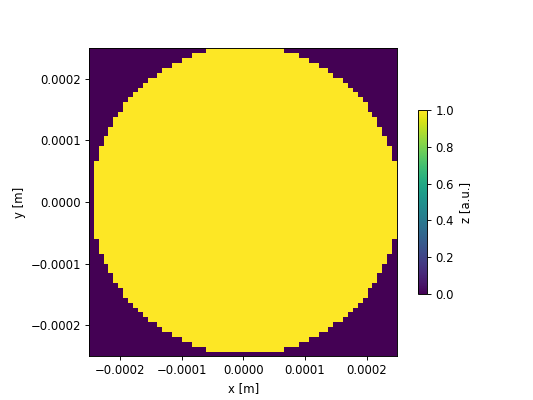

<IPython.core.display.Javascript object>


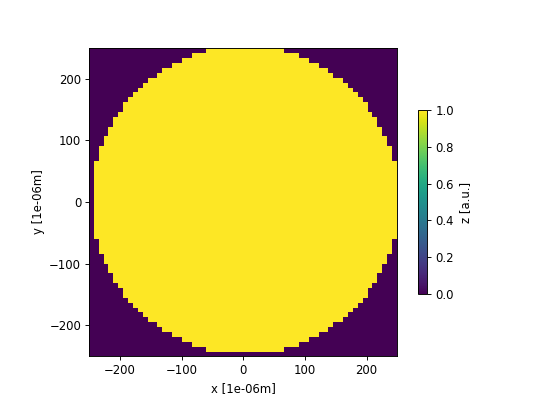

<IPython.core.display.Javascript object>


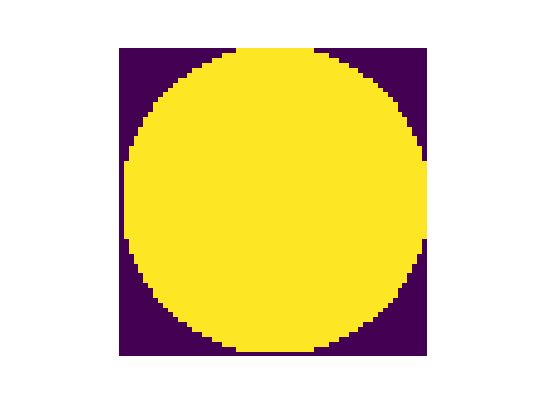

<IPython.core.display.Javascript object>


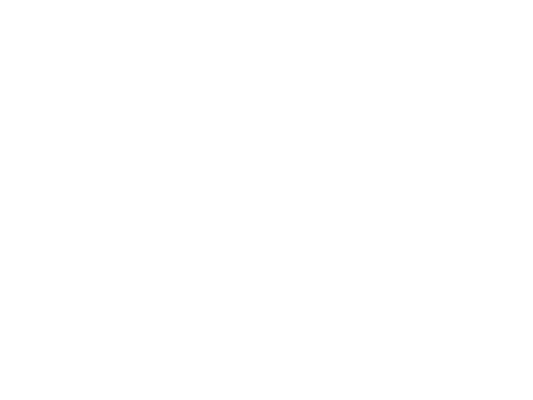

<IPython.core.display.Javascript object>


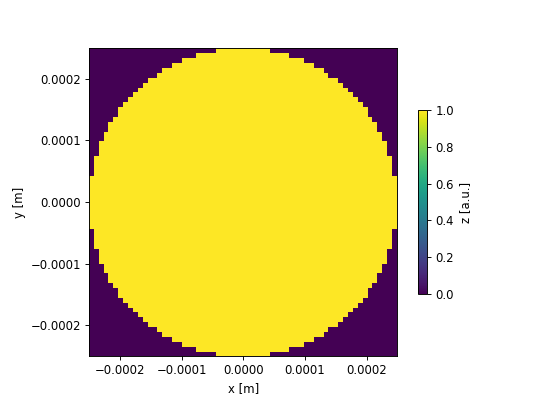

In [3]:
#make circular apertures (returns also the 2D array)
npix =64
xsiz =500
ysiz = 500

mask = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)

# Create circular aperture on mask
center=(0, 0 ) 
mask = moe.generate.circular_aperture(mask, radius=0.5*xsiz*micro, center=center )

moe.plotting.plot_aperture(mask)
moe.plotting.plot_aperture(mask, scale=micro)

# Plot only plot
moe.plotting.plot_aperture(mask, only_plot=True)
moe.generate.save_mask_plot(np.abs(mask.aperture-1), xsiz, ysiz, "circ.png")

#seems like using this the circle is not exactly centered 
###This can be solved with -> in fact seems like just by displacing it half a pixel up and down... 
### TO CHECK THE CODE  WHY 
center = (-xsiz/npix/2*micro, -ysiz/npix/2*micro) 
mask = moe.generate.circular_aperture(mask, radius=0.5*xsiz*micro, center=center )

moe.plotting.plot_aperture(mask)



<IPython.core.display.Javascript object>


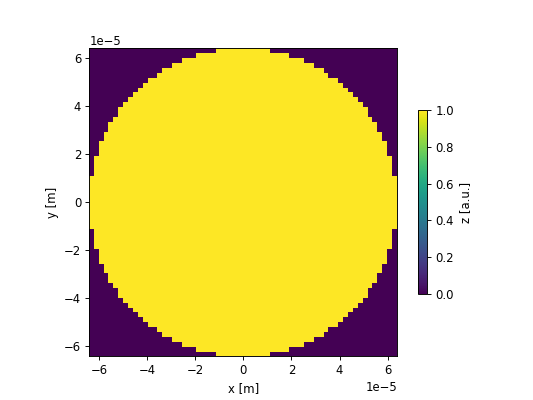

<IPython.core.display.Javascript object>


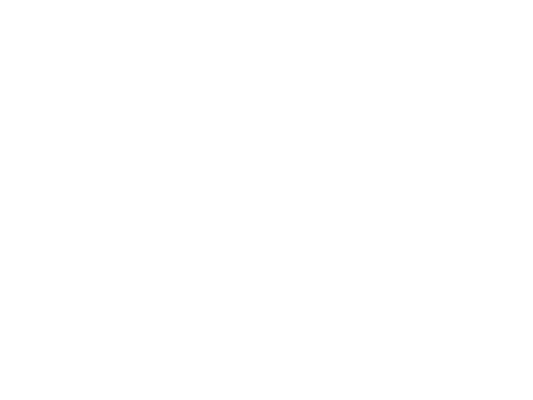

<IPython.core.display.Javascript object>


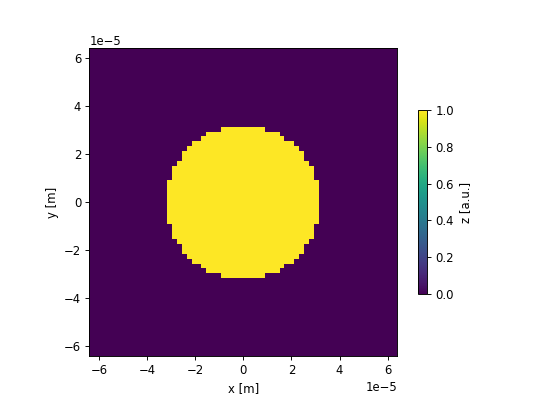

<IPython.core.display.Javascript object>


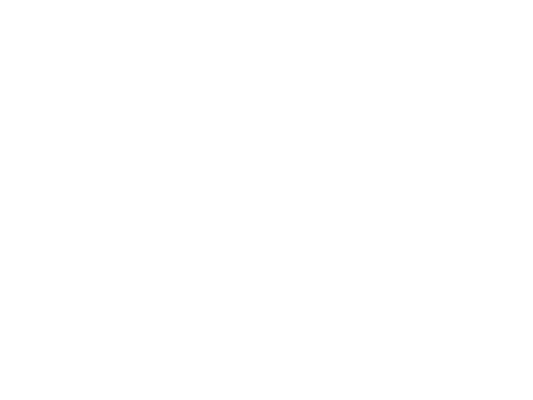

<IPython.core.display.Javascript object>


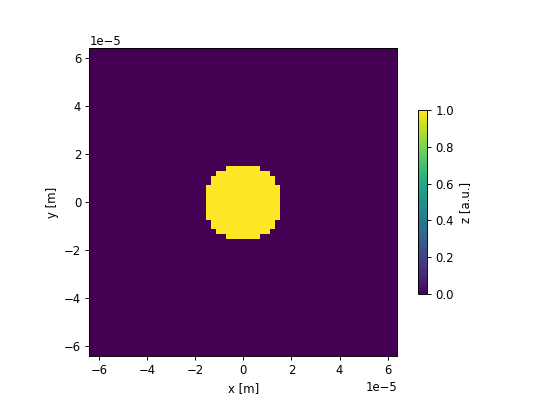

<IPython.core.display.Javascript object>


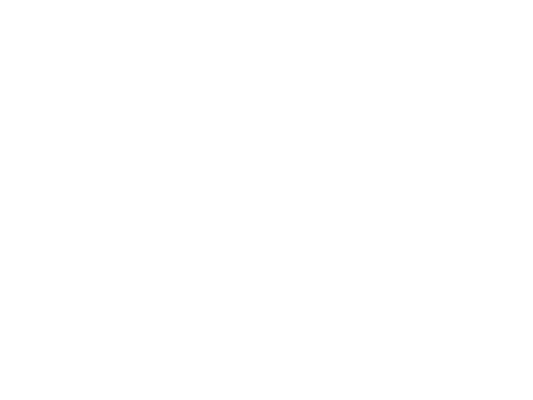

In [28]:
npix = 64
xsiz = 128
ysiz = 128

center = (-xsiz/npix/2*micro, -ysiz/npix/2*micro) 

aper1 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
aper2 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
aper3 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)

mask1 = moe.generate.circular_aperture(aper1, radius=0.5*xsiz*micro, center=center )
mask2 = moe.generate.circular_aperture(aper2, radius=0.25*xsiz*micro, center=center )
mask3 = moe.generate.circular_aperture(aper3, radius=0.125*xsiz*micro, center=center )

moe.plotting.plot_aperture(mask1)
moe.generate.save_mask_plot(np.abs(mask1.aperture-1), xsiz, ysiz, "circ1.png");

moe.plotting.plot_aperture(mask2)
moe.generate.save_mask_plot(np.abs(mask2.aperture-1), xsiz, ysiz, "circ2.png");

moe.plotting.plot_aperture(mask3)
moe.generate.save_mask_plot(np.abs(mask3.aperture-1), xsiz, ysiz, "circ3.png");

## Rectangular aperture 

<IPython.core.display.Javascript object>


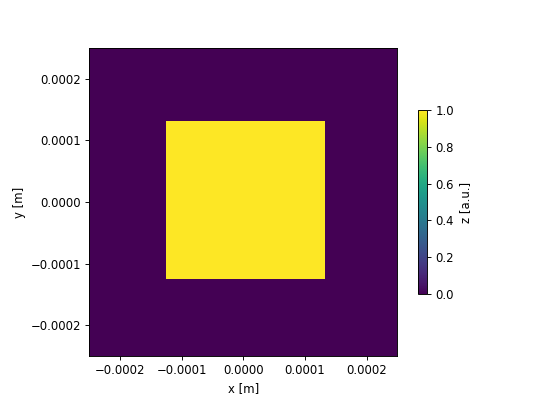

<IPython.core.display.Javascript object>


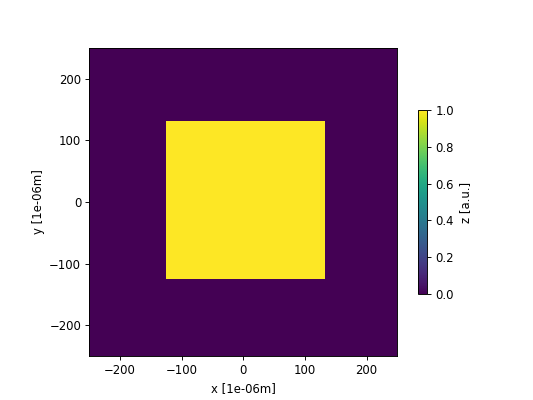

<IPython.core.display.Javascript object>


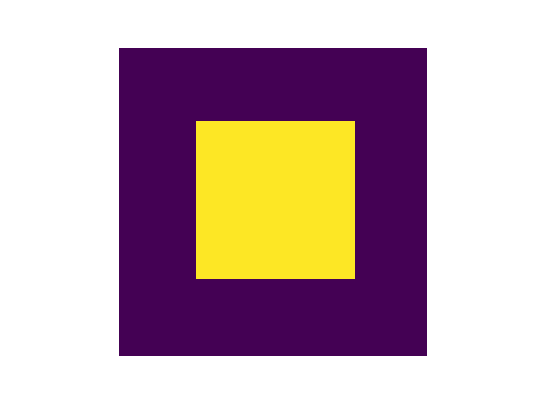

<IPython.core.display.Javascript object>


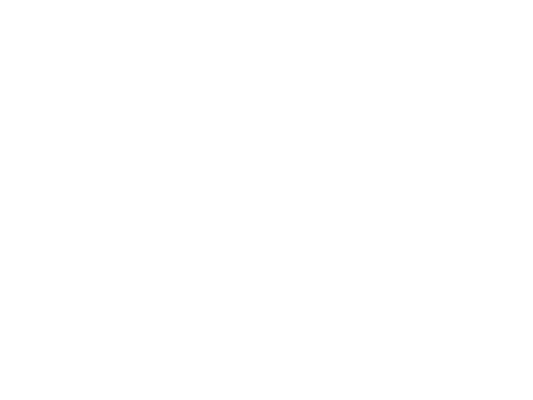

In [5]:
#make circular apertures (returns also the 2D array)
npix =64
xsiz = 500
ysiz = 500

mask = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix+1, -ysiz/2*micro, ysiz/2*micro, npix+1,)

# Create circular aperture on mask
center=(0, 0 ) 
partial = 0.5
mask = moe.generate.rectangular_aperture(mask, xsiz*micro*partial, ysiz*micro*partial,  center=center )

moe.plotting.plot_aperture(mask)
moe.plotting.plot_aperture(mask, scale=micro)

# Plot only plot
moe.plotting.plot_aperture(mask, only_plot=True)
moe.generate.save_mask_plot(np.abs(mask.aperture-1), xsiz, ysiz, "rect.png")



<IPython.core.display.Javascript object>


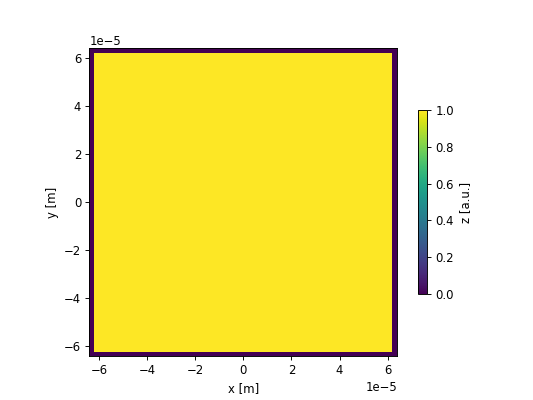

<IPython.core.display.Javascript object>


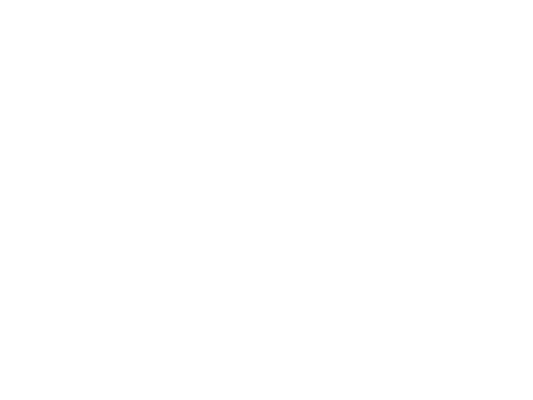

<IPython.core.display.Javascript object>


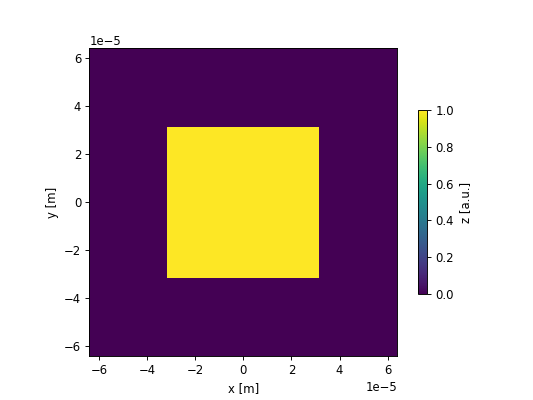

<IPython.core.display.Javascript object>


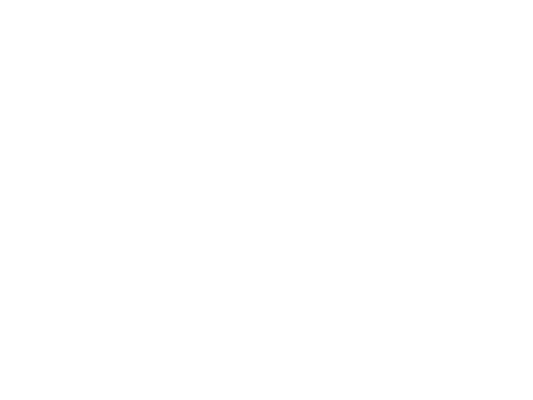

<IPython.core.display.Javascript object>


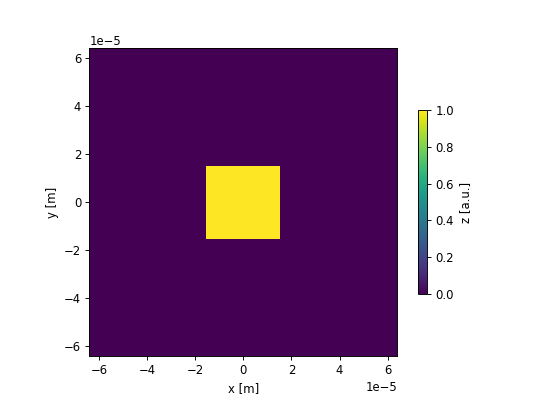

<IPython.core.display.Javascript object>


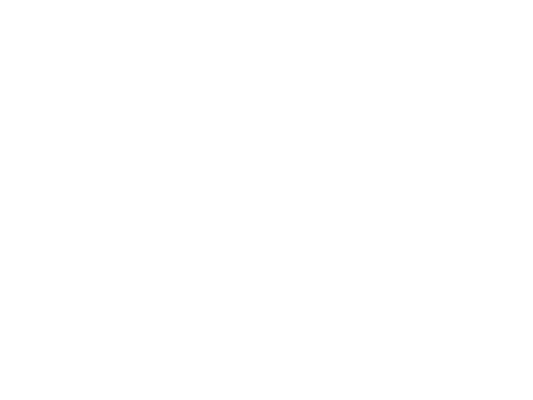

In [6]:
npix = 64
xsiz = 128
ysiz = 128

aper1 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
aper2 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
aper3 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)

###This can be solved with -> in fact seems like just by displacing it half a pixel up and down... 
### TO CHECK THE CODE  WHY 
center = (-xsiz/npix/2*micro, -ysiz/npix/2*micro) 

partial = 0.98
mask1 = moe.generate.rectangular_aperture(aper1, xsiz*micro*partial, ysiz*micro*partial,  center=center )

partial = 0.5 
mask2 = moe.generate.rectangular_aperture(aper2, xsiz*micro*partial, ysiz*micro*partial,  center=center )

partial = 0.25 
mask3 = moe.generate.rectangular_aperture(aper3, xsiz*micro*partial, ysiz*micro*partial,  center=center )

moe.plotting.plot_aperture(mask1)
moe.generate.save_mask_plot(np.abs(mask1.aperture-1), xsiz, ysiz, "rect1.png");

moe.plotting.plot_aperture(mask2)
moe.generate.save_mask_plot(np.abs(mask2.aperture-1), xsiz, ysiz, "rect2.png");

moe.plotting.plot_aperture(mask3)
moe.generate.save_mask_plot(np.abs(mask3.aperture-1), xsiz, ysiz, "rect3.png");




<IPython.core.display.Javascript object>


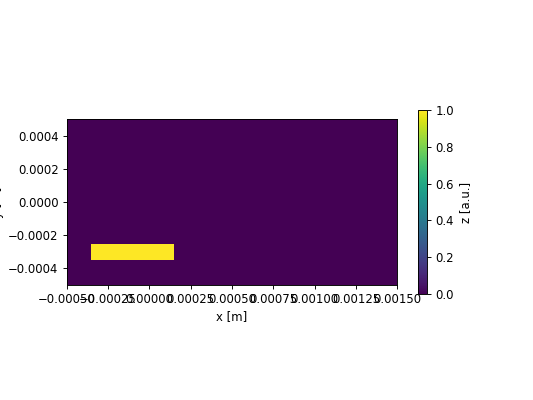

<IPython.core.display.Javascript object>


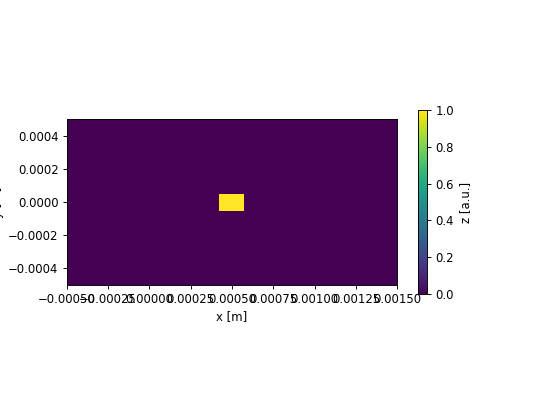

<IPython.core.display.Javascript object>


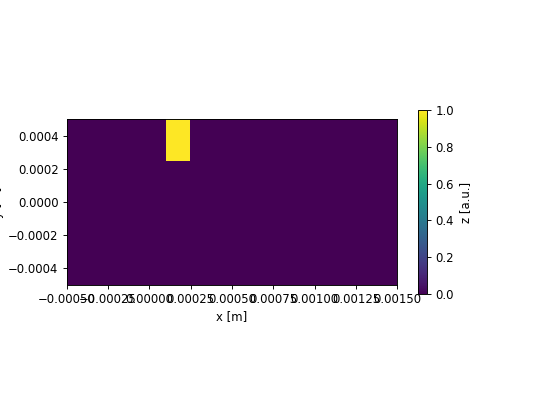

In [7]:
### Rectangular non-centered aperture 

# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)

# create rectangular mask
rectangle = moe.generate.rectangular_aperture(mask, 500*micro, 100*micro, center=(-100*micro, -300*micro))
moe.plotting.plot_aperture(rectangle, )

rectangle = moe.generate.rectangular_aperture(mask, 150*micro, 100*micro, )
moe.plotting.plot_aperture(rectangle, )

rectangle = moe.generate.rectangular_aperture(mask, 150*micro, 500*micro, corner=(100*micro, 250*micro))
moe.plotting.plot_aperture(rectangle, ) 

## Fresnel Zone Plate

<IPython.core.display.Javascript object>


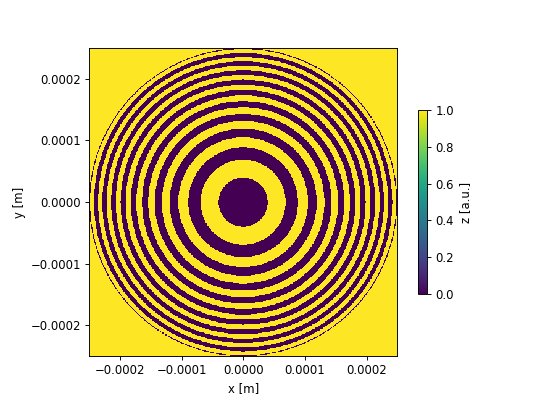

<IPython.core.display.Javascript object>


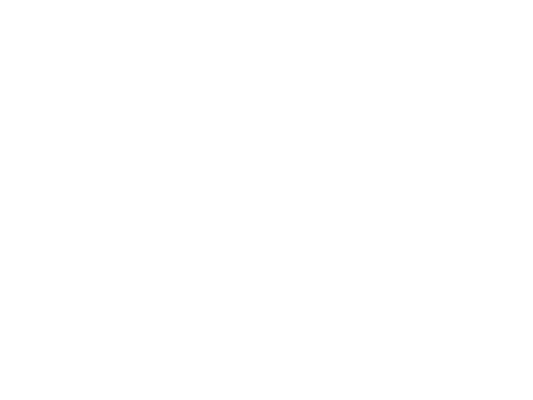

<IPython.core.display.Javascript object>


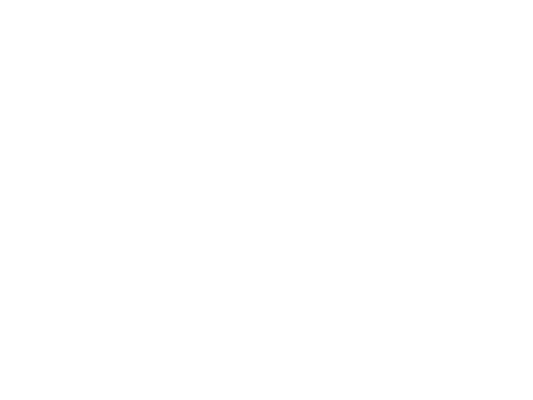

<IPython.core.display.Javascript object>


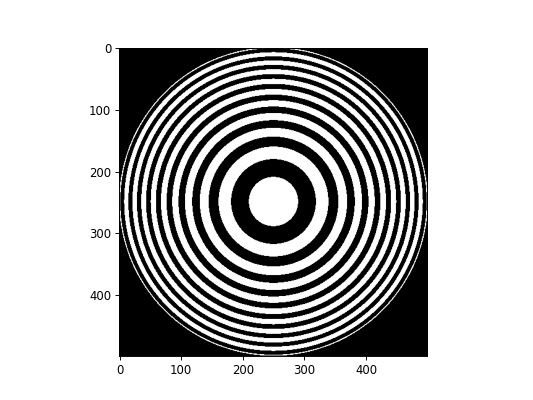

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [8]:
####generate a fresnel zone plate 

foc = 5000 # focal distance in um 
lda = 0.6328 #wavelength in um 
npix = 500 # nr of pixels 
xsiz = 500 #x-size 
ysiz = 500 #y-size 
imgfile = 'fresnel_zone_plate1.tiff' # name of img file

#center = (-xsiz/npix*micro/2, -ysiz/npix*micro/2) 
center = (0,0)
aper1 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
maskfzp = moe.generate.fresnel_zone_plate_aperture(aper1, foc * micro, lda * micro, radius=xsiz/2*micro, center = center)
moe.plotting.plot_aperture(maskfzp, )

#mask = moe.generate.circular_aperture(mask, radius=0.5*xsiz*micro, center=center )
#moe.plotting.plot_aperture(mask)

moe.generate.save_mask_plot(maskfzp.aperture, xsiz, ysiz, imgfile);


###Comparison to fzp_mask function (v0.0.1)

####generate a fresnel zone plate 

foc = 5000 # focal distance in um 
lda = 0.6328 #wavelength in um 
npix = 500 # nr of pixels 
xsiz = 500 #x-size 
ysiz = 500 #y-size 
imgname = 'fresnel_zone_plate2.tiff' # name of gds file

#Make grid, define only one grid 
tgrid = moe.generate.makegrid(npix, xsiz, ysiz)

fres = moe.generate.fzp_mask(npix, foc, lda, xsiz, ysiz, filename=imgname, plotting=True, grid = tgrid)


print(maskfzp.aperture)
print(fres)




In [9]:
#Check if both functions have the same map 

print(np.array_equal(maskfzp.aperture,fres ))

True


### Analysis of previous result 
Besides the array_equal result is false, seems they are the same visually 

where ( black = 1, white = 0 ) , (yellow = 1, purple =0)





<IPython.core.display.Javascript object>


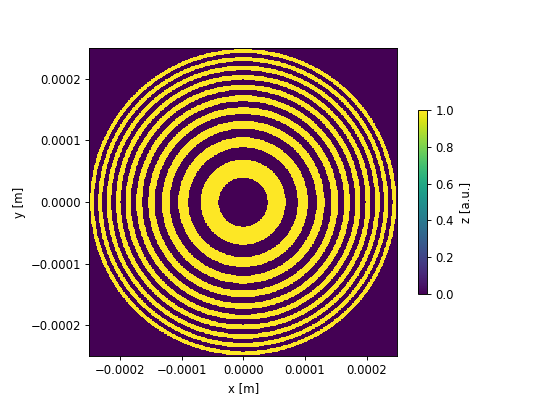

<IPython.core.display.Javascript object>


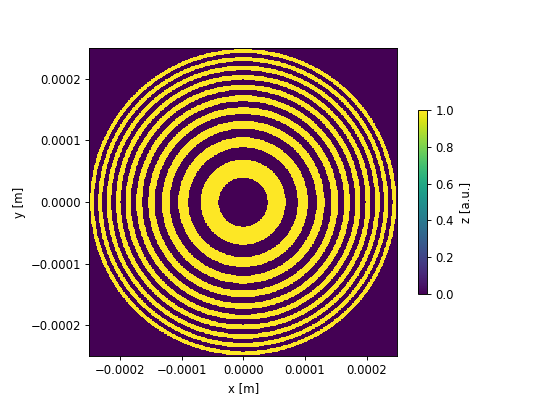

In [10]:
### The truncation operation can also be obtained from the truncate_aperture_radius function 

####generate a fresnel zone plate 
foc = 5000 # focal distance in um 
lda = 0.6328 #wavelength in um 
npix = 500 # nr of pixels 
xsiz = 500 #x-size 
ysiz = 500 #y-size 
imgfile = 'fresnel_zone_plate3.tiff' # name of img file


aper1 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)


maskfzp = moe.generate.fresnel_zone_plate_aperture(aper1, foc * micro, lda * micro,)
maskfzp_tr = moe.generate.truncate_aperture_radius(maskfzp, radius=xsiz/2*micro)

moe.plotting.plot_aperture(maskfzp_tr, )


###truncate an already truncated amsk 
maskfzp_tr = moe.generate.truncate_aperture_radius(maskfzp_tr, radius=xsiz/2*micro)

moe.plotting.plot_aperture(maskfzp_tr, )



###THIS GIVES THE NEGATIVE OF THE PREVIOUS ONE
#BECAUSE OF THE WAY THE FUNCTION fzp IS DEFINED, 
#it is made to have black (=1) on the border 
#So that the image file appears as black for 0 value of the field 
#therefore the inversion between both 
#BUT NOW, this needs to be corrected if we are using it for the files 



In [11]:
#Export the image into a gds using the  export module 

infilxe = 'fresnel_zone_plate1.tiff' # name of img file
outfilxe = 'fresnel_zone_plate.gds'
pixelx = 1 #um 
pixely = 1 #um 
cellname = 'TOP'

moe.export.grayim2gds(infilxe, outfilxe, pixelx, pixely,cellname, 0)

Exported the image file fresnel_zone_plate1.tiff into fresnel_zone_plate.gds


## Fresnel phase mask

<IPython.core.display.Javascript object>


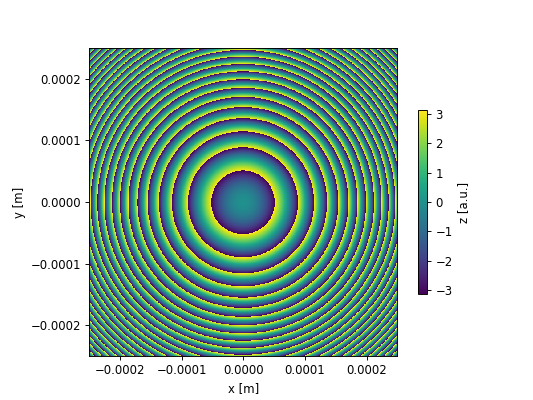

<IPython.core.display.Javascript object>


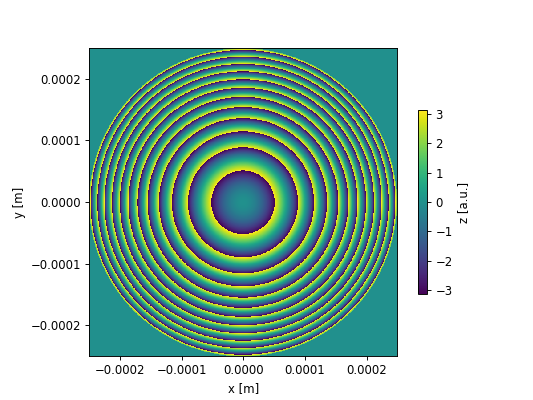

<IPython.core.display.Javascript object>


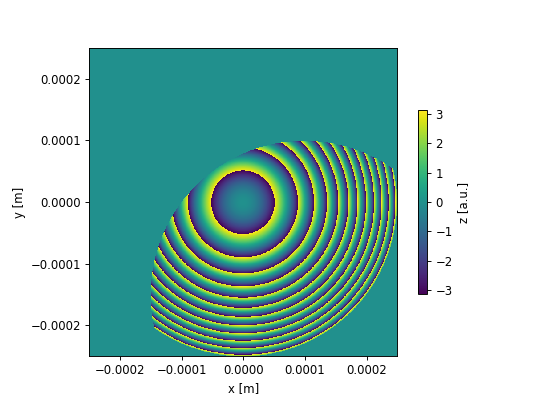

In [12]:
####generate a fresnel phase mask and save it into gds 
npix = 1001 # nr of pixels 
foc = 5000 # focal distance in um 
lda = 0.532 #wavelength in um 
xsiz = 500 #x-size 
ysiz = 500 #y-size
n = 10  # number of gray levels 
gdsname = 'fresnel_phase_mask.gds' # name of gds file


###Fresnel phase mask 

aperture1 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
mask1 = moe.generate.fresnel_phase(aperture1, foc * micro, lda * micro, )
moe.plotting.plot_aperture(mask1, )


##############
###Fresnel mask with a truncated circular aperture 

# Create empty mask
aperture2 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)

# and truncate around radius
mask2 = moe.generate.fresnel_phase(aperture2, foc * micro, lda * micro, radius=xsiz/2*micro)
moe.plotting.plot_aperture(mask2, )


################
###Fresnel phase mask with a displaced center 
# Create empty mask
aperture3 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)

#by default the aperture4 takes the mask at the center = (0,0) 
aperture4 = moe.generate.fresnel_phase(aperture3, foc * micro, lda * micro, radius = xsiz/2*micro)

# and truncate around radius
center = (100*micro, -150*micro)
mask3 = moe.generate.truncate_aperture_radius(aperture4, xsiz/2*micro, center = center)
moe.plotting.plot_aperture(mask3, )



## Generate phase mask from arbitrary phase function 

<IPython.core.display.Javascript object>


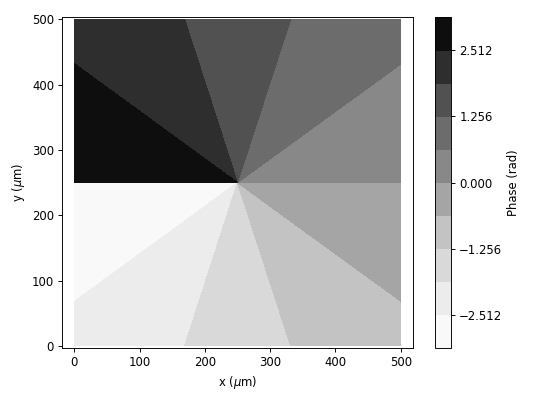

Passing contours into GDS. 
0
1
2
3
4
5
6
7
8
9
Saved the phase profile with 10 layers into the file spiral_phase_plate.gds


array([[-2.35619449, -2.35418646, -2.35217037, ..., -0.78942229,
        -0.78740619, -0.78539816],
       [-2.35820252, -2.35619449, -2.35417836, ..., -0.78741429,
        -0.78539816, -0.78339013],
       [-2.36021861, -2.35821062, -2.35619449, ..., -0.78539816,
        -0.78338204, -0.78137404],
       ...,
       [ 2.36021861,  2.35821062,  2.35619449, ...,  0.78539816,
         0.78338204,  0.78137404],
       [ 2.35820252,  2.35619449,  2.35417836, ...,  0.78741429,
         0.78539816,  0.78339013],
       [ 2.35619449,  2.35418646,  2.35217037, ...,  0.78942229,
         0.78740619,  0.78539816]])

In [13]:
### Example with a spiral complex phase function from version v0.0.1  

from pyMOE.generate import *  

#attention, make sure to have enough pixels 
npix = 5000  # number of pixels 
xsiz = 500 #x-size 
ysiz = 500 #y-size 
ltop = 1 #topological number

#spiral mask is defined as  
#spiral(x,y,x0,y0,ltop)
    
def spiral(x,y,x0,y0,L):
    """
    returns a spiral COMPLEX PHASE with input meshgrid (x,y) with center at (x0,y0)
    x = x array from meshgrid 
    y = y array from meshgrid 
    x0 = x-coordinate of center of the lens 
    y0 = y-coordinate of center of the lens
    L = topological charge 
    """

    theta = np.arctan2((y-y0),(x-x0))
    sp = np.exp(1.0j*L*theta)
    return sp
    

n =10 # number of gray levels 
gdsfile = "spiral_phase_plate.gds"  #name of gds file 

moe.generate.arbitrary_phase_mask('gdspy', npix, xsiz, ysiz,n, spiral, L=ltop, \
           filename=gdsfile, plotting=True ,prec = 1e-12, mpoints = 1e9, grid = tgrid)


<IPython.core.display.Javascript object>


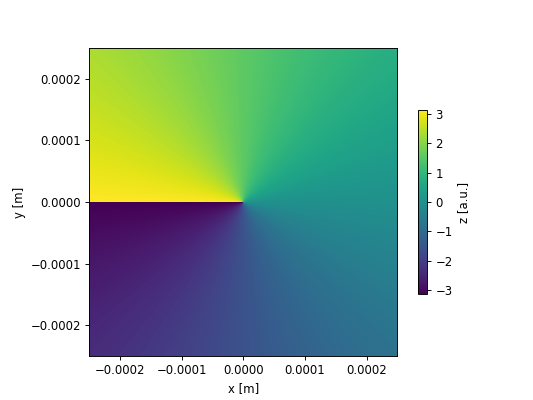

<IPython.core.display.Javascript object>


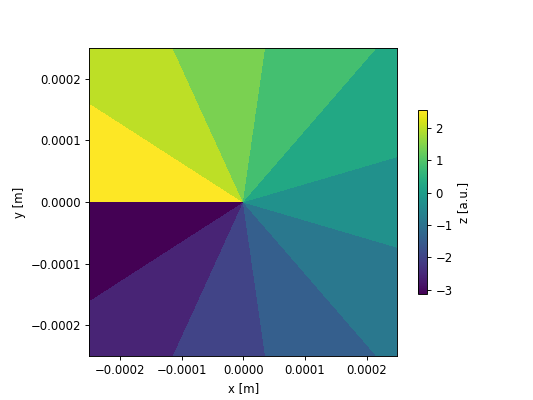

In [14]:
###Using the v0.1 functions 

center = (0, 0)

aperture = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=1)
moe.plotting.plot_aperture(mask)


##discretized levels 
mask.discretize(n+1)
moe.plotting.plot_aperture(mask) 


### A CONCERN IS THAT THE ACTUAL VALUE OF THE PHASE IN THIS CASE SEEMS TO BE NOT CENTERED AROUND phase =0 rad
#-> TO CHECK WHAT ARE THE VALUES OF PHASE ARE ACTUALLY BEING ATTRIBUTTED 


<IPython.core.display.Javascript object>


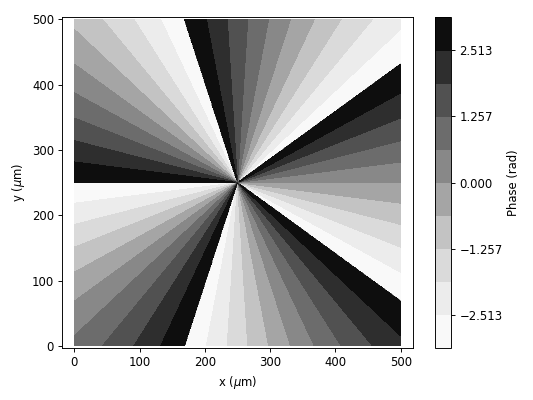

Passing contours into GDS. 
0
1
2
3
4
5
6
7
8
9
Saved the phase profile with 10 layers into the file spiral_phase_plate5.gds


<IPython.core.display.Javascript object>


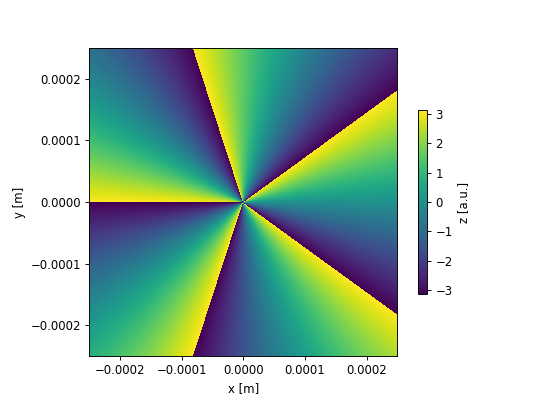

<IPython.core.display.Javascript object>


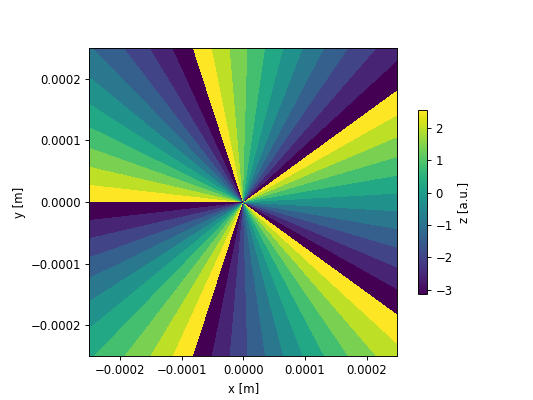

In [15]:
ltop = 5
moe.generate.arbitrary_phase_mask('gdspy', npix, xsiz, ysiz,n, spiral, L=ltop, \
           filename='spiral_phase_plate'+str(ltop)+'.gds', plotting=True ,prec = 1e-12, mpoints = 1e9, grid = tgrid)

##Compare the function with topological number equals to 5 
aperture = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=5)
moe.plotting.plot_aperture(mask) 

mask.discretize(n+1)
moe.plotting.plot_aperture(mask) 

<IPython.core.display.Javascript object>


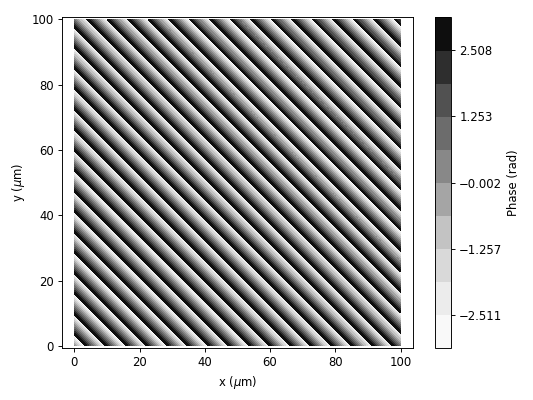

Passing contours into GDS. 
0
1
2
3
4
5
6
7
8
9
Saved the phase profile with 10 layers into the file arbitrary_function.gds


array([[ 0.13274123,  0.08271622,  0.0326912 , ...,  0.76375617,
         0.71373116,  0.66370614],
       [ 0.08271622,  0.0326912 , -0.01733381, ...,  0.71373116,
         0.66370614,  0.61368113],
       [ 0.0326912 , -0.01733381, -0.06735882, ...,  0.66370614,
         0.61368113,  0.56365612],
       ...,
       [ 0.76375617,  0.71373116,  0.66370614, ...,  1.39477111,
         1.3447461 ,  1.29472108],
       [ 0.71373116,  0.66370614,  0.61368113, ...,  1.3447461 ,
         1.29472108,  1.24469607],
       [ 0.66370614,  0.61368113,  0.56365612, ...,  1.29472108,
         1.24469607,  1.19467106]])

In [16]:
### Example with a function defined on the go
#Using version v0.0.1
npix = 2000  # number of pixels 
xsiz = 100 #x-size 
ysiz = 100 #y-size 


##Arbitrarily defined function for exemplification 
#corresponds to a blazed grating 
def fexample(x,y,x0,y0,a,b):
    """
    returns a COMPLEX function (the function to implement NEEDS to be complex to extract the phase!)
    x = x array from meshgrid 
    y = y array from meshgrid 
    x0 = x-coordinate of center 
    y0 = y-coordinate of center 
    a = arbitrary parameter
    b  = arbitrary parameter 
    """
    
    sfunc = (- a * (x + y)  -b) 
    func = np.exp(1.0j*sfunc)

    return func

aval = 1
bval = 25
n = 10 # number of gray levels 
gdsfile = "arbitrary_function.gds"  #name of gds file 

#Let's iuse te 
moe.generate.arbitrary_phase_mask('gdspy',npix, xsiz, ysiz,n, fexample, a= aval, b = bval, \
           filename=gdsfile, plotting=True ,prec = 1e-9, mpoints = 1e9)

##careful, if using more precision than the availble in the grid, spurious points will be set at the grid side boundary 


<IPython.core.display.Javascript object>


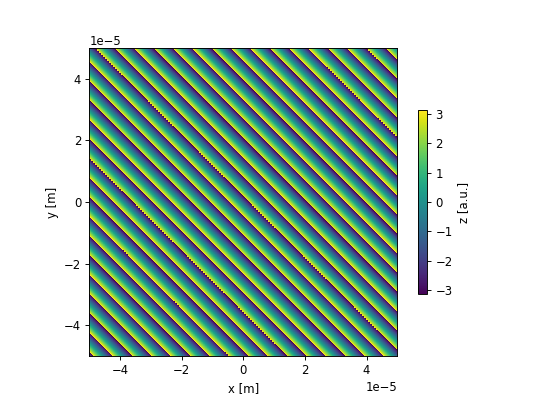

<IPython.core.display.Javascript object>


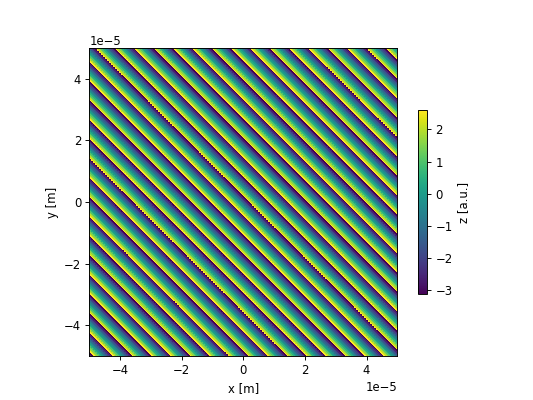

In [17]:
### Example with a function defined on the go
#Using v0.1 functions 

npix = 2000  # number of pixels 
xsiz = 100 #x-size 
ysiz = 100 #y-size 


##Arbitrarily defined function for exemplification 
#corresponds to a blazed grating  
def fexample(x,y,a,b):
    """
    returns a COMPLEX function (the function to implement NEEDS to be complex to extract the phase!)
    x = x array from meshgrid 
    y = y array from meshgrid 
    a = arbitrary parameter
    b  = arbitrary parameter 
    """
    
    sfunc = (- a * (x + y)*1e6  -b) 
    func = np.exp(1.0j*sfunc)
    #func = np.imag(func)
    func = np.angle(func)
    return func

aval = 1
bval = 1
n = 11 # number of gray levels 


aperture = moe.generate.create_empty_aperture(-xsiz/2 * micro, xsiz/2 * micro, npix, -ysiz/2 * micro, ysiz/2 *micro, npix,)
mask =  moe.generate.arbitrary_aperture_function(aperture, fexample,a =aval , b = bval,  center=center)
moe.plotting.plot_aperture(mask) 

mask.discretize(n+1)
moe.plotting.plot_aperture(mask)


<IPython.core.display.Javascript object>


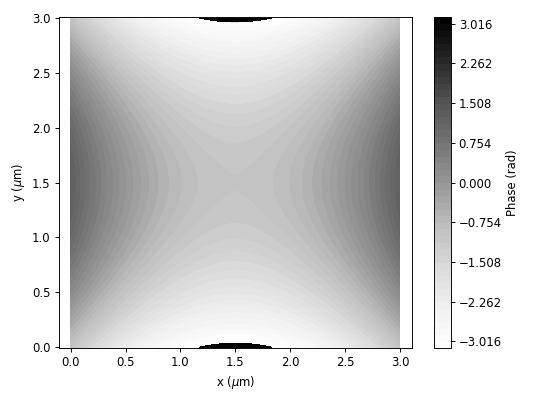

Passing contours into GDS. 
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Saved the phase profile with 50 layers into the file arbitrary_function.gds


array([[-1.        , -1.0018    , -1.00359928, ..., -1.00359928,
        -1.0018    , -1.        ],
       [-0.9982    , -1.        , -1.00179928, ..., -1.00179928,
        -1.        , -0.9982    ],
       [-0.99640072, -0.99820072, -1.        , ..., -1.        ,
        -0.99820072, -0.99640072],
       ...,
       [-0.99640072, -0.99820072, -1.        , ..., -1.        ,
        -0.99820072, -0.99640072],
       [-0.9982    , -1.        , -1.00179928, ..., -1.00179928,
        -1.        , -0.9982    ],
       [-1.        , -1.0018    , -1.00359928, ..., -1.00359928,
        -1.0018    , -1.        ]])

In [18]:
### Another example with a function defined on the go

npix = 5000  # number of pixels 
xsiz = 3 #x-size 
ysiz = 3 #y-size 


##Arbitrarily defined function for exemplification 
#corresponds to a saddle surface 
def fexample(x,y,x0,y0,a,b):
    """
    returns a COMPLEX function (the function to implement NEEDS to be complex to extract the phase!)
    x = x array from meshgrid 
    y = y array from meshgrid 
    x0 = x-coordinate of center 
    y0 = y-coordinate of center 
    a = arbitrary parameter
    b  = arbitrary parameter 
    """

    x = x-x0 
    y = y-y0
    sfunc =  (a * ((x*x - y*y)) -b) 
    func = np.exp(1.0j*sfunc)

    return func

aval = 1
bval = 1
xo = 1.5
yo = 1.5
n = 50 # number of gray levels 


#Make grid, define only one grid (else, if only one is necessary, put None for the default)
tgrid = moe.generate.makegrid(npix, xsiz, ysiz)

#Let's iuse te 
moe.generate.arbitrary_phase_mask('gdspy',npix, xsiz, ysiz,n, fexample, a= aval, b = bval, \
           filename=gdsfile, plotting=True ,prec = 1e-9, mpoints = 1e9, grid = tgrid)

##careful, if using more precision than the availble in the grid, spurious points will be set at the grid side boundary 


<IPython.core.display.Javascript object>


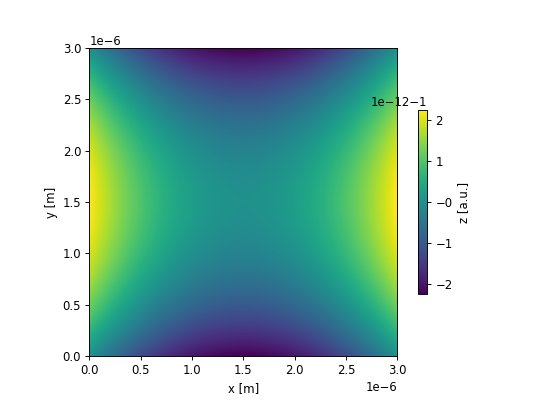

<IPython.core.display.Javascript object>


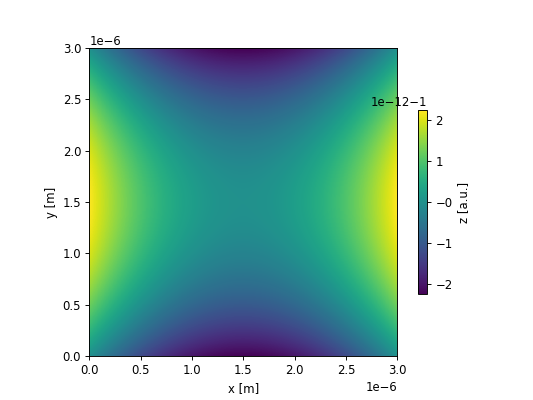

<IPython.core.display.Javascript object>


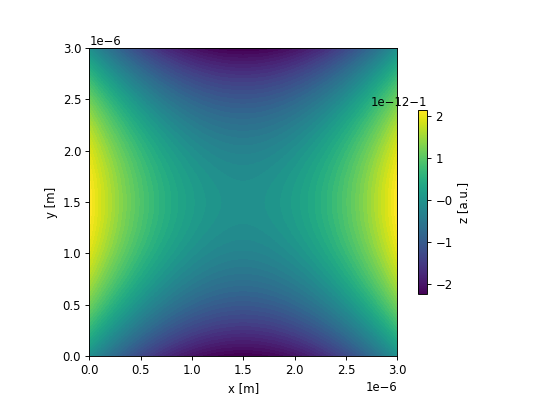

In [19]:
### Another example with a function defined on the go

npix = 1000  # number of pixels 
xsiz = 3 #x-size 
ysiz = 3 #y-size 


##just defined saddle function   (same as in the sag functions modules)
def funct(x,y,a,b):
    """
    returns a COMPLEX PHASE saddle function 
    Args:
        x = x array from meshgrid 
        y = y array from meshgrid 
        a = arbitrary parameter
        b  = arbitrary parameter 
    """

    sfunc =  (a * ((x*x - y*y)) -b) 
    func = np.exp(1.0j*sfunc)
    func = np.angle(func)

    return func

aval = 1
bval = 1

center = (1.5e-6, 1.5e-6)

n = 50 # number of gray levels 


###make the saddle with the  just defined function 

aperture = moe.generate.create_empty_aperture(0, xsiz * micro, npix, 0, ysiz *micro, npix,)

aperture =  moe.generate.arbitrary_aperture_function(aperture, funct, center=center, a=aval,b=bval)
moe.plotting.plot_aperture(aperture)



###make the  saddle with the same with the saddle function 

aperture = moe.generate.create_empty_aperture(0, xsiz * micro, npix+1, 0, ysiz *micro, npix+1,)
mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.saddle, center=center, a=aval,b=bval)
moe.plotting.plot_aperture(mask)

mask.discretize(n+1)
moe.plotting.plot_aperture(mask)




<IPython.core.display.Javascript object>


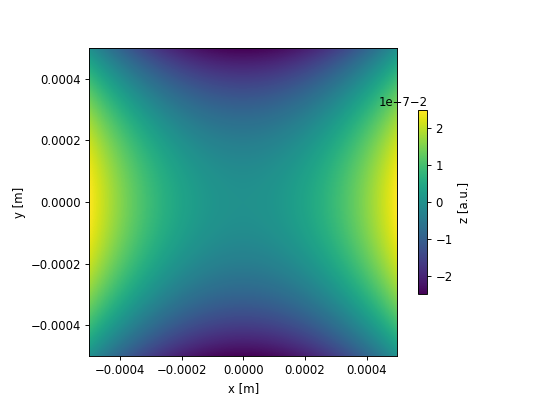

In [20]:
# Saddle function

aperture = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
center=(0,0)
aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.saddle, center=center, a=1,b=2)
moe.plotting.plot_aperture(aperture)



<IPython.core.display.Javascript object>


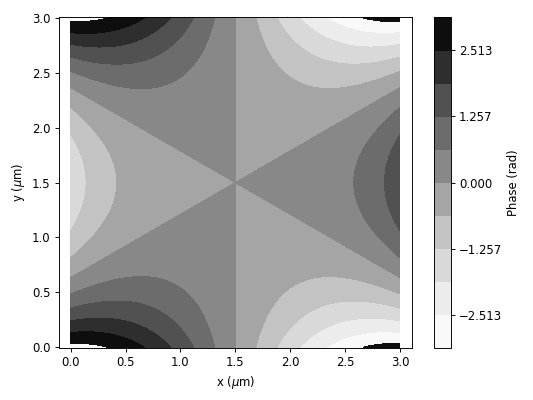

Passing contours into GDS. 
0
1
2
3
4
5
6
7
8
9
Saved the phase profile with 10 layers into the file arbitrary_function_msaddle.gds


array([[-2.90818531, -2.90818612, -2.90818855, ...,  2.90818855,
         2.90818612,  2.90818531],
       [-2.91223531, -2.9122345 , -2.91223531, ...,  2.91223531,
         2.9122345 ,  2.91223531],
       [-2.91628369, -2.91628126, -2.91628045, ...,  2.91628045,
         2.91628126,  2.91628369],
       ...,
       [-2.91628369, -2.91628126, -2.91628045, ...,  2.91628045,
         2.91628126,  2.91628369],
       [-2.91223531, -2.9122345 , -2.91223531, ...,  2.91223531,
         2.9122345 ,  2.91223531],
       [-2.90818531, -2.90818612, -2.90818855, ...,  2.90818855,
         2.90818612,  2.90818531]])

In [21]:
### Another example with a function defined on the go 

npix = 5000  # number of pixels 
xsiz = 3 #x-size 
ysiz = 3 #y-size 


##Arbitrarily defined function for exemplification 
#corresponds to a monkey saddle 
def fexample(x,y,x0,y0,a,b):
    """
    returns a COMPLEX function (the function to implement NEEDS to be complex to extract the phase!)
    x = x array from meshgrid 
    y = y array from meshgrid 
    x0 = x-coordinate of center 
    y0 = y-coordinate of center 
    a = arbitrary parameter
    b  = arbitrary parameter 
    """
    
    x = x-x0 
    y = y-y0
    sfunc =  (a * ((x*x*x- 3*x*y*y)) -b) 
    func = np.exp(1.0j*sfunc)

    return func

aval = 0.5
bval = 0
xo = 1.5
yo = 1.5
n = 10 # number of gray levels 
gdsfile = "arbitrary_function_msaddle.gds"  #name of gds file 


#Make grid, define only one grid (else, if only one is necessary, put None for the default)
tgrid = moe.generate.makegrid(npix, xsiz, ysiz)

#Let's use the arbitrary function 
moe.generate.arbitrary_phase_mask('gdspy',npix, xsiz, ysiz,n, fexample, a= aval, b = bval, \
           filename=gdsfile, plotting=True ,prec = 1e-9, mpoints = 1e9, grid = tgrid)

##careful, if using more precision than the availble in the grid, spurious points will be set at the grid side boundary 


<IPython.core.display.Javascript object>


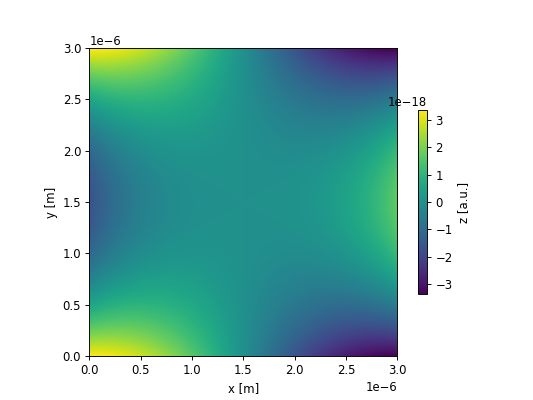

<IPython.core.display.Javascript object>


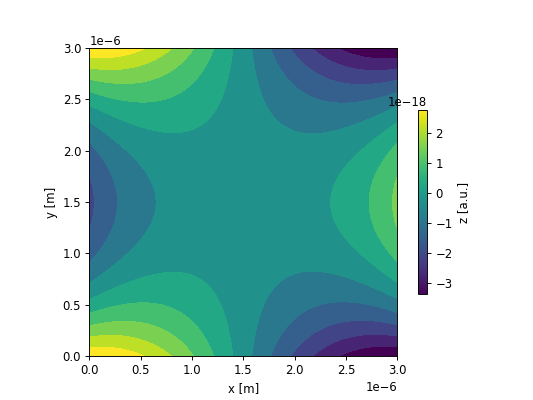

<IPython.core.display.Javascript object>


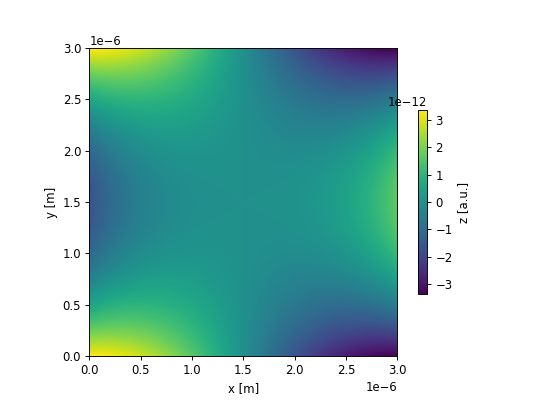

In [22]:
### Another example with a function defined on the go 

npix = 5000  # number of pixels 
xsiz = 3 #x-size 
ysiz = 3 #y-size 

def fexample2(x,y,a,b):
    """
    returns a COMPLEX PHASE monkey saddle function 
    Args:
        x = x array from meshgrid 
        y = y array from meshgrid 
        a = arbitrary parameter
        b  = arbitrary parameter 
    """
    
    sfunc =  (a * ((x*x*x- 3*x*y*y)) -b) 
    func = np.exp(1.0j*sfunc)
    func = np.angle(func)

    return func

aval = 0.5
bval = 0
xo = 1.5
yo = 1.5
n = 10 # number of gray levels 

center = (xo*1e-6, yo*1e-6)


###make the saddle with the  just defined function 

###make the  saddle with the same with the saddle function 

aperture = moe.generate.create_empty_aperture(0, xsiz * micro, npix, 0, ysiz *micro, npix,)
mask =  moe.generate.arbitrary_aperture_function(aperture, fexample2, center=center, a=aval,b=bval)
moe.plotting.plot_aperture(mask)

mask.discretize(n+1)
moe.plotting.plot_aperture(mask)




###make the monkey saddle from the function defined in the sag functions 
aperture = moe.generate.create_empty_aperture(0, xsiz * micro, npix, 0, ysiz *micro, npix,)
mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.msaddle, center=center, a=aval,b=bval)
moe.plotting.plot_aperture(mask)





## Compatibility workaround for functions from version v0.0.1  in with dev-v0.1 syntax/framework

Allows to use exactly same functions from v0.0.1 with dev-v0.1 functions

<IPython.core.display.Javascript object>


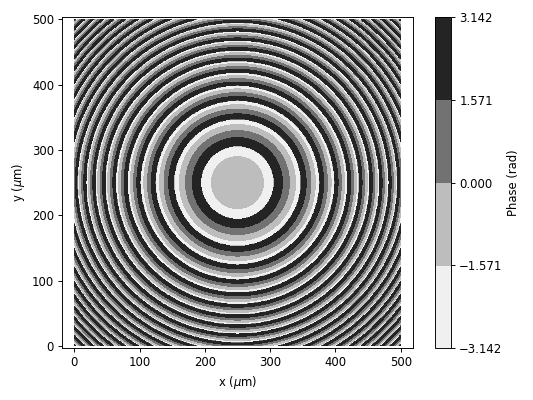

Passing contours into GDS. 
0
1
2
3
Saved the phase profile with 5 layers into the file phase-comparison.gds


In [23]:
### phase vals on the mask 

def lensfres(x,y,x0,y0,fo,lda): 
    """
    returns the COMPLEX PHASE of a fresnel lens ith input meshgrid (x,y) with center at (x0,y0)
    x = x array from meshgrid 
    y = y array from meshgrid 
    x0 = coordinate of center of the lens 
    y0 = coordinate of center of the lens
    fo = focal distance 
    lda = wavelength 
    
    Note: for angle (in rad), call numpy.angle(...)
    """

    rc = np.sqrt((x-x0)**2 + (y-y0)**2)
    fresn = np.exp(1.0j*(fo-np.sqrt(fo**2 + rc**2))*(2*np.pi)/(lda))
    return fresn 
    

#Select exact position of contours  in phase
phas_vals = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]

vphase = moe.generate.arbitrary_phase_mask('gdspy',500, 500,500, len(phas_vals),\
           lensfres, fo=5000, lda=0.6328, \
           filename="phase-comparison.gds", plotting=True ,\
                   prec = 1e-6, mpoints = 1e9, zlevs =phas_vals    )

############################################################
##defining a function with the previously defined contours that will be used to populate an aperture object 

def vals(x,y): 
    vals = moe.generate.arbitrary_phase_mask('gdspy',500, 500,500, len(phas_vals) -1,\
           lensfres, fo=5000, lda=0.6328, \
           filename=None, plotting = True ,\
                   prec = 1e-6, mpoints = 1e9, zlevs =phas_vals    )
    return vals 


<IPython.core.display.Javascript object>


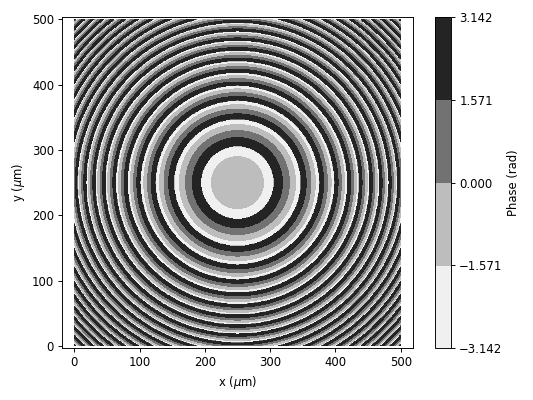

Passing contours into GDS. 
0
1
2
3


<IPython.core.display.Javascript object>


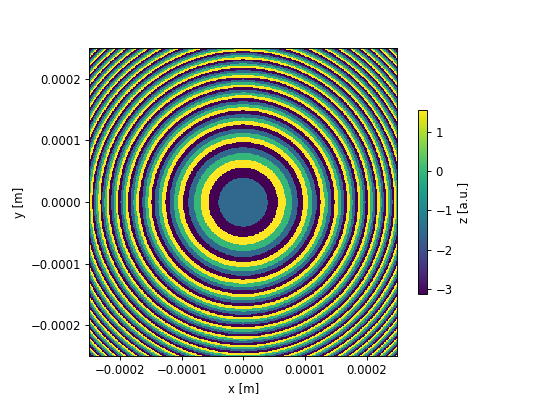

Mask has 250000 number of points distributed in 5 layers
Creating individual pixel polygons
Progress: [####################] 100.0%
[Create Polygons]
Elapsed: 0:00:04.128212
Merging layer 0 of 4 with 62816 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:16.004454
Merging layer 1 of 4 with 64272 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:16.840171
Merging layer 2 of 4 with 60752 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:17.133076
Merging layer 3 of 4 with 62160 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:16.374846
Merging layer 4 of 4 with 0 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:00
[Total time converting to GDS]
Elapsed: 0:01:10.482759
Saved fresnel_mask.gds


In [24]:
#Demonstrate compatibility between the two frameworks 

aperturex = moe.generate.create_empty_aperture(-250*micro, 250*micro, 500, -250*micro, 250*micro, 500,)
maskx =  moe.generate.arbitrary_aperture_function(aperturex,vals , center=center)

#n = len(phas_vals) -1

maskx.discretize(np.array( phas_vals) ) 
moe.plotting.plot_aperture(maskx)

###########################################################
#######Export the mask 
# Create GDSMask
gdsmask = moe.GDSMask(maskx)

# Create layout and merge polygons together
gdsmask.create_layout(merge=True)

gdsmask.write_gds("fresnel_mask.gds")


In [25]:
###Both generated files were compared and correspond closely 
## Conclusion -> The dev-v0.1 functions taking as input the 2D array from the contours generate files in agreement with v0.0.1 

#File of comparison between both versions: "phase-comparison-1.gds"

<IPython.core.display.Javascript object>


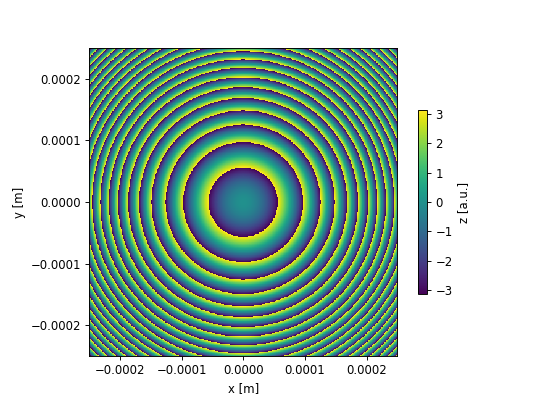

<IPython.core.display.Javascript object>


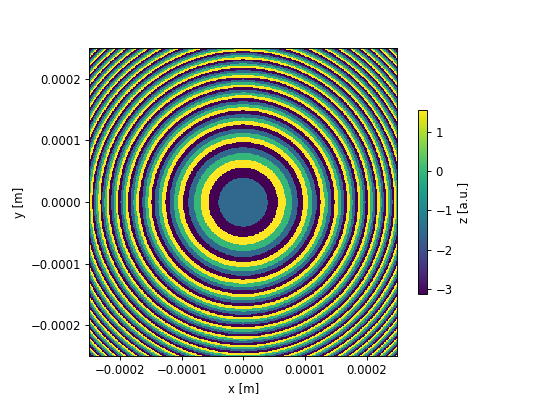

In [29]:
####generate a fresnel phase mask and save it into gds 
npix = 500 # nr of pixels 
foc = 5000 # focal distance in um 
lda = 0.6328 #wavelength in um 
xsiz = 500 #x-size 
ysiz = 500 #y-size
n = 4  # number of gray levels 
gdsname = 'fresnel_phase_mask2.gds' # name of gds file


###Fresnel phase mask 
##using the aperture 
aperture1 = moe.generate.create_empty_aperture(-xsiz/2*micro, xsiz/2*micro, npix, -ysiz/2*micro, ysiz/2*micro, npix,)
mask1 = moe.generate.fresnel_phase(aperture1, foc * micro, lda * micro, )
moe.plotting.plot_aperture(mask1, )

mask1.discretize(np.array( phas_vals) ) 
moe.plotting.plot_aperture(mask1)

In [27]:
# Create GDSMask
gdsmask = moe.GDSMask(mask1)

# Create layout and merge polygons together
gdsmask.create_layout(merge=True)

gdsmask.write_gds("fphase.gds")

Mask has 250000 number of points distributed in 5 layers
Creating individual pixel polygons
Progress: [####################] 100.0%
[Create Polygons]
Elapsed: 0:00:03.272043
Merging layer 0 of 4 with 62816 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:16.610205
Merging layer 1 of 4 with 64272 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:16.903791
Merging layer 2 of 4 with 60752 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:15.845223
Merging layer 3 of 4 with 62160 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:16.314575
Merging layer 4 of 4 with 0 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:00
[Total time converting to GDS]
Elapsed: 0:01:08.948839
Saved fphase.gds


In [ ]:
###Both generated files were compared and correspond closely 
## Conclusion -> The dev-v0.1 functions generate , using the framework, generates results in agreeement with v0.0.1 

#File of comparison between both versions: "phase-comparison-2.gds"


In [30]:
#File of comparison between both results from dev-v0.1 for the mesh 2D from the the contours  of v0.0.1
#And the file generated directly using the functions from  dev-v0.1

## Operations between masks  

<IPython.core.display.Javascript object>


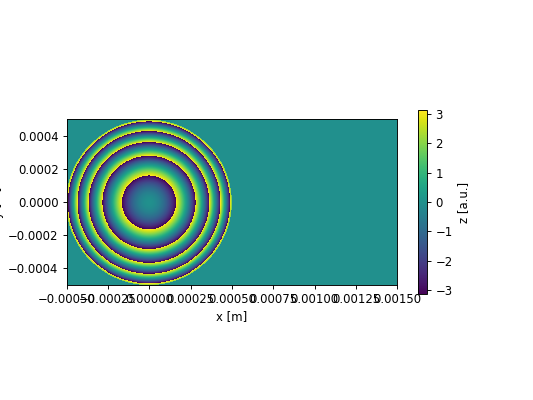

<IPython.core.display.Javascript object>


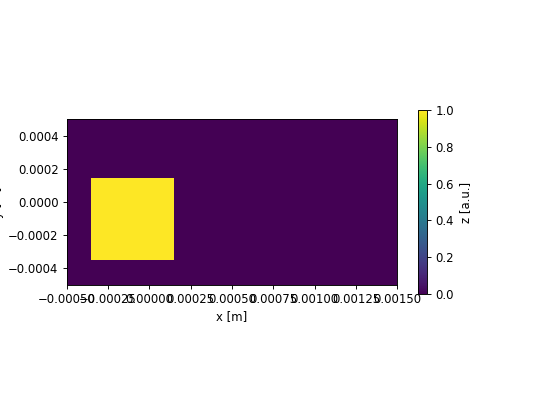

<IPython.core.display.Javascript object>


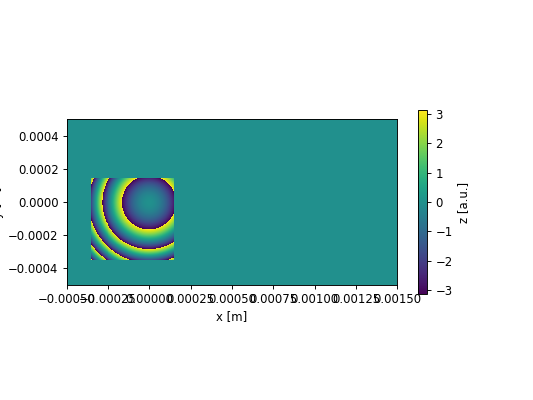

In [25]:
##Multiply two masks to obtain a composite mask 

aperture1 = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)
aperture1 = moe.generate.fresnel_phase(aperture1, 50*milli, 532*nano, radius=500*micro)

moe.plotting.plot_aperture(aperture1)

# Create empty mask
rectangle_mask = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)
rectangle_mask = moe.generate.rectangular_aperture(rectangle_mask, 500*micro, 500*micro, center=(-100*micro, -100*micro))
moe.plotting.plot_aperture(rectangle_mask)

#multiply both masks 
aperture3 = moe.generate.aperture_multiply(aperture1, rectangle_mask)
moe.plotting.plot_aperture(aperture3, )


<IPython.core.display.Javascript object>


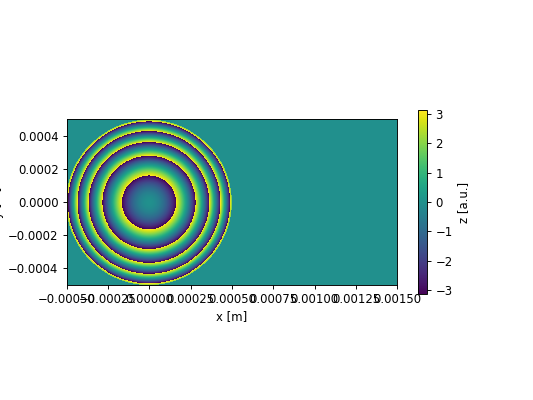

<IPython.core.display.Javascript object>


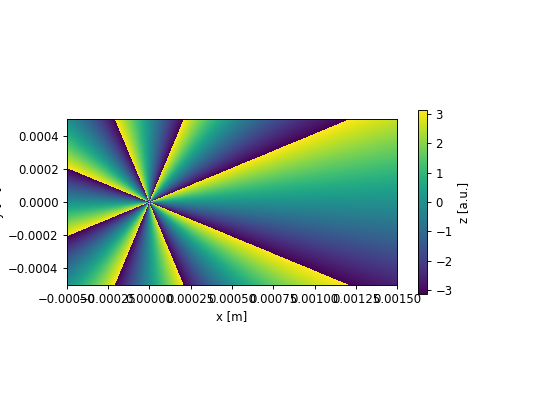

<IPython.core.display.Javascript object>


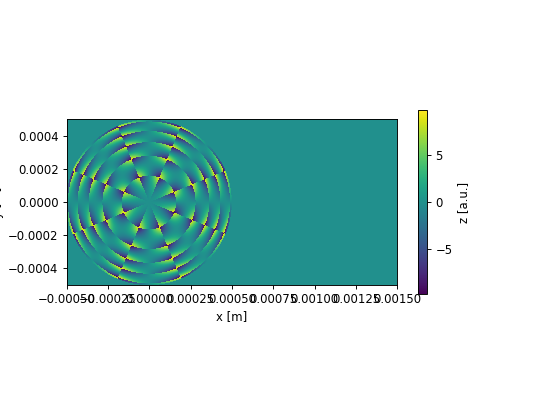

<IPython.core.display.Javascript object>


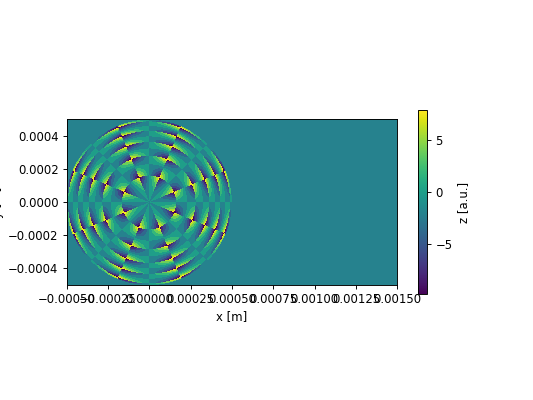

In [26]:
aperture1 = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)
aperture1 = moe.generate.fresnel_phase(aperture1, 50*milli, 532*nano, radius=500*micro)

moe.plotting.plot_aperture(aperture1)

aperture2 = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)
aperture2 =  moe.generate.arbitrary_aperture_function(aperture2, moe.sag.spiral, center=center, L=8)

moe.plotting.plot_aperture(aperture2)

# Operation of both apertures
aperture3 = moe.generate.aperture_operation(aperture1, aperture2, np.multiply)
moe.plotting.plot_aperture(aperture3)

aperture3.discretize(10)
moe.plotting.plot_aperture(aperture3)

In [27]:
###EXTRA 

#Using gdsconverter module to save the n

# Create GDSMask
#gdsmask = moe.GDSMask(aperture3)

# Create layout and merge polygons together
#gdsmask.create_layout(merge=True)

#gdsmask.write_gds("operation.gds")

<IPython.core.display.Javascript object>


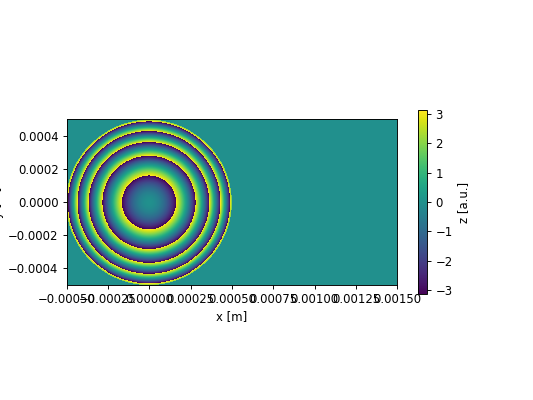

<IPython.core.display.Javascript object>


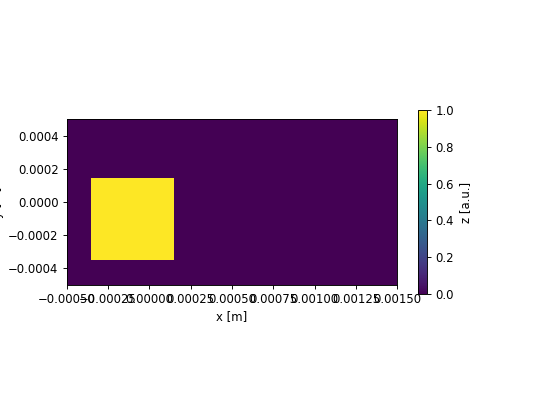

<IPython.core.display.Javascript object>


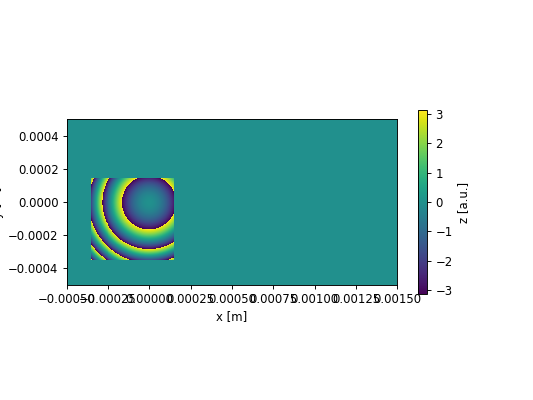

In [28]:
aperture1 = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)
aperture1 = moe.generate.fresnel_phase(aperture1, 50*milli, 532*nano, radius=500*micro)

moe.plotting.plot_aperture(aperture1, )

# Create empty mask
rectangle_mask = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)
rectangle_mask = moe.generate.rectangular_aperture(rectangle_mask, 500*micro, 500*micro, center=(-100*micro, -100*micro))
moe.plotting.plot_aperture(rectangle_mask, )


aperture3 = moe.generate.aperture_multiply(aperture1, rectangle_mask)
moe.plotting.plot_aperture(aperture3, )


## Extra: Zernike polynomials mask

In [29]:
#Zernike polynomial from https://github.com/jacopoantonello/zernike 

from zernike import RZern
import numpy as np 

def makezernike(x,y,L,K, num):
    """
    Adapting code from https://github.com/jacopoantonello/zernike to 
    return a COMPLEX PHASE with Zernike polynomial shape of Noll index num 
    Args:
        x = x array from meshgrid 
        y = y array from meshgrid 
        L = number of pixels on x
        K = number of pixels on y 
        num = Noll index of the Zernike polynomial 
            (see https://en.wikipedia.org/wiki/Zernike_polynomials#Noll's_sequential_indices )
    """

    cart = RZern(num)

    #the way the function works is a bit special 
    #because it is between -1 and 1 with a number 
    ddx = np.linspace(-1.0, 1.0, K)
    ddy = np.linspace(-1.0, 1.0, L)
    xv, yv = np.meshgrid(ddx, ddy)
    cart.make_cart_grid(xv, yv)

    c = np.zeros(cart.nk)
  
    for i in range(num, num+1):
        #plt.subplot(1, 1,1)
        c *= 0.0
        c[i] = 1.0
        Phik = cart.eval_grid(c, matrix=True)
        
        ephik = np.exp( Phik*1.0j*0.55 ) 
        #AD-HOC * 0.55 factor!! TO BE CORRECTED 
        
        mphi = np.angle(ephik )  
        mphi = np.nan_to_num(mphi, copy=True, nan=0.0, posinf=None, neginf=None)
        return mphi 

<IPython.core.display.Javascript object>


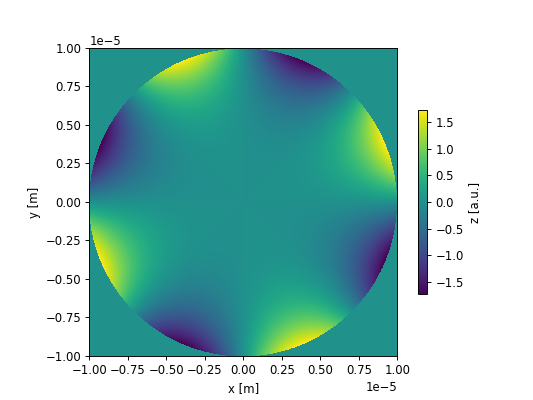

<IPython.core.display.Javascript object>


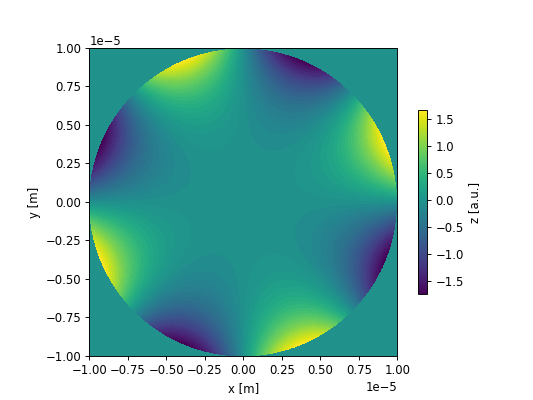

In [30]:
###Calculating and exporting a Zernike polynomial function 

npix = 2000  # number of pixels 
xsiz = 10 #x-size 
ysiz = 10 #y-size 

aval = 0.5
bval = 0
xo = 1.5
yo = 1.5
n =50 # number of gray levels 
#gdsfile = "arbitrary_function_zernike.gds"  #name of gds file 

center = (0,0 )

aperture = moe.generate.create_empty_aperture(-xsiz*micro, xsiz*micro, npix+1, -ysiz*micro, ysiz*micro, npix+1,)
mask =  moe.generate.arbitrary_aperture_function(aperture, makezernike, center=center, L = npix +1 , K = npix +1 , num=14)
moe.plotting.plot_aperture(mask)

mask.discretize(n+1)
moe.plotting.plot_aperture(mask) 
